# Лабораторная работа 1. Линейная регрессия. Нормальное уравнение

Если для оценки качества в регресии используется среднеквадратичная ошибка (*mean squared error, MSE*), то ошибка на одном примере (*функция потерь*) будет определяться выражением:

$$L(y,a)=(a-y)^2$$

а суммарная ошибка (*функционал ошибки*):

$$MSE(a,X)=\frac1{l}\sum_{i=1}^lL(y_i,a(\overrightarrow{x_i}))=\frac1{l}\sum_{i=1}^l(a(\overrightarrow{x_i})-y_i)^2$$

В случае линейной регресии:

$$a(\overrightarrow{x_i})=\langle \overrightarrow{w},\overrightarrow{x_i}\rangle$$

Задача оптимизации:

$$\frac1{l}\sum_{i=1}^l (\langle \overrightarrow{w},\overrightarrow{x_i}\rangle-y_i)^2\to \min_{\overrightarrow{w}}$$

Тогда, продифференцировав функционал ошибки по $\overrightarrow{w}$, приравняв его нулю и решив полученное уравнение, получим следующее выражение для оптимального вектора весов, которое называется *нормальным уравнением*:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

**Задание 1. Пример из лекций**

Напишите функцию ``get_weight``, которая находит вектор весов на основе нормального уравнения.

Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5$$

$$y_1=1, y_2=3, y_3=4$$

Имейте в виду, что $X$ – это матрица (в данном примере состоящая из одного столбца).

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as sla
from numpy.linalg import multi_dot
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
def add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.concatenate((ones, X), axis = 1)

def get_weight(X, y):
    if X.ndim == 1:
        X = X[:, np.newaxis]
        
    X = add_ones(X)
    X_transposed = np.transpose(X)

    w = multi_dot([sla.inv(np.dot(X_transposed, X)), X_transposed, y])
    return w

def y_predict(X, w):
    if X.ndim == 1:
        X = X[:, np.newaxis]
    
    return np.dot(add_ones(X), w)

X = np.array([2, 3, 5])
y = np.array([1, 3, 4])
w = get_weight(X, y)

print(f"w = {w}")
y_predicted = y_predict(X, w)
print(f"y_predicted = {y_predicted}")

w = [-0.42857143  0.92857143]
y_predicted = [1.42857143 2.35714286 4.21428571]


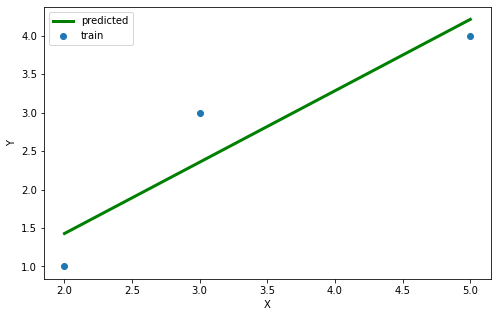

In [3]:
plt.figure(figsize = (8, 5))
plt.plot(X, y_predicted, color = "green", linewidth = 3, linestyle = "-")
plt.scatter(X, y)
plt.legend(["predicted", "train"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$.

In [4]:
def get_squared_errors(y_test, y_predict):
    return (y_test - y_predict) ** 2

def MSE(y_test, y_predict):
    squared_errors = get_squared_errors(y_test, y_predict)
    l = np.size(squared_errors)
    return np.sum(squared_errors) / l

def RMSE(y_test, y_predict):
    return np.sqrt(MSE(y_test, y_predict))

def R2(y_test, y_predict):
    squared_errors = get_squared_errors(y_test, y_predict)
    y_mean = np.mean(y_test)
    return 1 - np.sum(squared_errors) / np.sum((y_test - y_mean) ** 2)

scikit_learn_mse = mean_squared_error(y, y_predicted)
scikit_learn_r2 = r2_score(y, y_predicted)

print(f"MSE = {MSE(y, y_predicted)}, scikit-learn MSE = {scikit_learn_mse}")
print(f"RMSE = {RMSE(y, y_predicted)}, scikit-learn RMSE = {np.sqrt(scikit_learn_mse)}")
print(f"R2 = {R2(y, y_predicted)}, scikit-learn R2 = {scikit_learn_r2}")

MSE = 0.2142857142857143, scikit-learn MSE = 0.2142857142857143
RMSE = 0.46291004988627577, scikit-learn RMSE = 0.46291004988627577
R2 = 0.8622448979591837, scikit-learn R2 = 0.8622448979591837


Сравните полученные значения с библиотечными функциями $MSE$ и $R2$ из [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

**Задание 2. Более сложный пример**.
Скачайте файлы ``ml_lab1_train.txt`` и ``ml_lab1_test.txt``. В первом из них находится обучающая выборка, а во втором – тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом – $n$ точек (значения аргумента $x$), во втором – значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача – по обучающей выборке подобрать функцию $y = a(x)$, приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [5]:
data_train = np.loadtxt("ml_lab1_train.txt", delimiter=',')
data_train

array([[-0.2       ,  4.10083261],
       [-0.14      ,  4.75632474],
       [-0.08      ,  4.16278839],
       [-0.02      ,  4.94568077],
       [ 0.04      ,  4.9964461 ],
       [ 0.1       ,  3.67344585],
       [ 0.16      ,  4.07405522],
       [ 0.22      ,  4.12650853],
       [ 0.28      ,  5.25101279],
       [ 0.34      ,  5.69160283],
       [ 0.4       ,  5.06788376],
       [ 0.46      ,  6.07176274],
       [ 0.52      ,  5.76661215],
       [ 0.58      ,  5.76998646],
       [ 0.64      ,  5.39647832],
       [ 0.7       ,  5.46744837],
       [ 0.76      ,  5.46450349],
       [ 0.82      ,  7.23168494],
       [ 0.88      ,  6.09781368],
       [ 0.94      ,  7.0778812 ],
       [ 1.        ,  7.05182585]])

In [6]:
X_train = data_train[:,0]
Y_train = data_train[:,1]

In [7]:
data_test = np.loadtxt("ml_lab1_test.txt", delimiter=",")
data_test

array([[-0.3       ,  4.22468198],
       [-0.23      ,  3.6806801 ],
       [-0.16      ,  4.86193723],
       [-0.09      ,  4.12182311],
       [-0.02      ,  3.89129282],
       [ 0.05      ,  4.77528678],
       [ 0.12      ,  4.84650657],
       [ 0.19      ,  3.29232057],
       [ 0.26      ,  3.77839618],
       [ 0.33      ,  4.16851703],
       [ 0.4       ,  5.43651587],
       [ 0.47      ,  4.74066998],
       [ 0.54      ,  5.45091177],
       [ 0.61      ,  5.23766541],
       [ 0.68      ,  5.84027585],
       [ 0.75      ,  5.79299791],
       [ 0.82      ,  7.12448917],
       [ 0.89      ,  6.11752856],
       [ 0.96      ,  6.00190132],
       [ 1.03      ,  7.26882794],
       [ 1.1       ,  7.48272721]])

In [8]:
X_test = data_test[:, 0]
Y_test = data_test[:, 1]

Найдите с помощью функции ``get_weight`` линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость.  
Выведите значения весовых коэффициентов.

In [9]:
weights = get_weight(X_train, Y_train)
print(f"weights = {weights}")

weights = [4.43323091 2.2791345 ]


Нарисуйте на плоскости точки обучающей и тестовой выборок (раскрасив в два цвета) $(x_i, y_i)$ и полученную линейную функцию.

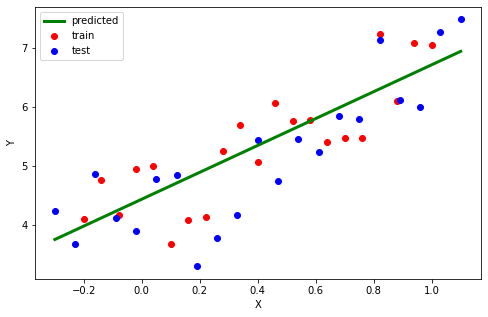

In [10]:
plt.figure(figsize = (8, 5))

X_min = np.min(np.concatenate((X_train, X_test)))
X_max = np.max(np.concatenate((X_train, X_test)))
X = np.array([X_min, X_max])

plt.plot(X, y_predict(X, weights), color = "green", linewidth = 3, linestyle = "-")
plt.scatter(X_train, Y_train, color = "red")
plt.scatter(X_test, Y_test, color = "blue")
plt.legend(["predicted", "train", "test"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$. Сравните их со значениями библиотечных функций `scikit-learn`.

In [11]:
print(f"MSE = {MSE(Y_test, y_predict(X_test, weights))}, scikit-learn MSE = {mean_squared_error(Y_test, y_predict(X_test, weights))}")
print(f"RMSE = {RMSE(Y_test, y_predict(X_test, weights))}, scikit-learn RMSE = {np.sqrt(mean_squared_error(Y_test, y_predict(X_test, weights)))}")
print(f"R2 = {R2(Y_test, y_predict(X_test, weights))}, scikit-learn R2 = {r2_score(Y_test, y_predict(X_test, weights))}")

MSE = 0.4351202004048873, scikit-learn MSE = 0.4351202004048873
RMSE = 0.6596364153114103, scikit-learn RMSE = 0.6596364153114103
R2 = 0.6848801332179674, scikit-learn R2 = 0.6848801332179674
